<a href="https://colab.research.google.com/github/adrak-sleeps/Crop-Disease-Detection-using-Drone/blob/main/Crop_Disease_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crop Disease Detection Using Naive CNN**

## **Importing the PlantVillage Dataset from Kaggle**

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ansitabehera","key":"eb8e57d47a18c3801e5d07dcb050c9c4"}\r\n\r\n'}

In [3]:
# Downloading the PlantVillage dataset from Kaggle and unzipping it
%%capture
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip /content/new-plant-diseases-dataset.zip

## **Importing required libraries**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2 as cv

## **Preparing the images**

In [ ]:
path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train = os.listdir(path+'/train')
key_value = dict()
for t in range(len(train)):
    key_value[train[t]] = os.listdir(path+'/train/'+train[t])

In [ ]:
df = []
for i in range(len(train)):
    for j in range(len(key_value[train[i]])):
        df.append([path+'/train/'+train[i]+'/'+key_value[train[i]][j],train[i]])

In [ ]:
test = pd.DataFrame(df,columns=['image','label'])
test

,image,label
0,/content/New Plant Diseases Dataset(Augmented)...,Blueberry___healthy
1,/content/New Plant Diseases Dataset(Augmented)...,Blueberry___healthy
2,/content/New Plant Diseases Dataset(Augmented)...,Blueberry___healthy
3,/content/New Plant Diseases Dataset(Augmented)...,Blueberry___healthy
4,/content/New Plant Diseases Dataset(Augmented)...,Blueberry___healthy
...,...,...
70290,/content/New Plant Diseases Dataset(Augmented)...,Strawberry___healthy
70291,/content/New Plant Diseases Dataset(Augmented)...,Strawberry___healthy
70292,/content/New Plant Diseases Dataset(Augmented)...,Strawberry___healthy
70293,/content/New Plant Diseases Dataset(Augmented)...,Strawberry___healthy


In [ ]:
x = []
for i in test['image']:
    img = cv.imread(i)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.resize(img,(64,64))
    x.append(img)

In [ ]:
x = np.array(x).reshape(70295, 64, 64,1)
np.save('image_array',x)

In [ ]:
y = test['label']   
le = LabelEncoder()
y_label = le.fit_transform(y)

In [ ]:
train_images,test_images,train_labels,test_labels = train_test_split(x,y_label,test_size=0.2,random_state=42)

In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:
y_test = pd.DataFrame(train_labels)

### **Building the 3-layered CNN**

In [ ]:
model = Sequential()
model.add(Conv2D(128,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(38,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 128)       3328      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 256)       590080    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 256)       

## **Training the Model**

In [ ]:
history = model.fit(train_images,y_test,epochs=10,validation_data = (test_images,test_labels))

Epoch 1/10
1758/1758 [==============================] - 33s 17ms/step - loss: 1.5539 - accuracy: 0.5396 - val_loss: 0.8769 - val_accuracy: 0.7180
Epoch 2/10
1758/1758 [==============================] - 30s 17ms/step - loss: 0.6567 - accuracy: 0.7890 - val_loss: 0.6812 - val_accuracy: 0.7796
Epoch 3/10
1758/1758 [==============================] - 30s 17ms/step - loss: 0.4039 - accuracy: 0.8671 - val_loss: 0.6082 - val_accuracy: 0.8088
Epoch 4/10
1758/1758 [==============================] - 30s 17ms/step - loss: 0.2509 - accuracy: 0.9152 - val_loss: 0.6518 - val_accuracy: 0.8121
Epoch 5/10
1758/1758 [==============================] - 30s 17ms/step - loss: 0.1722 - accuracy: 0.9423 - val_loss: 0.7786 - val_accuracy: 0.7996
Epoch 6/10
1758/1758 [==============================] - 30s 17ms/step - loss: 0.1363 - accuracy: 0.9536 - val_loss: 0.8785 - val_accuracy: 0.8013
Epoch 7/10
1758/1758 [==============================] - 30s 17ms/step - loss: 0.1149 - accuracy: 0.9606 - val_loss: 0.8680 -

### **The 3-layered CNN gives 81.7% validation accuracy on the PlantVillage Dataset.**

## **Testing the Model**

440/440 [==============================] - 2s 5ms/step
printed label : 10
actual label : 10


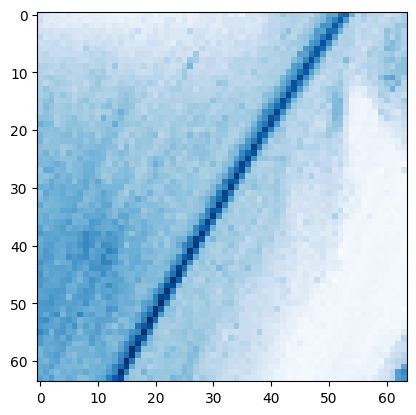

In [ ]:
plt.imshow(test_images[25],cmap='Blues')
print('printed label :',model.predict(test_images).argmax(axis=1)[25])
print('actual label :', test_labels[25])

## **Plotting the Accuracies**

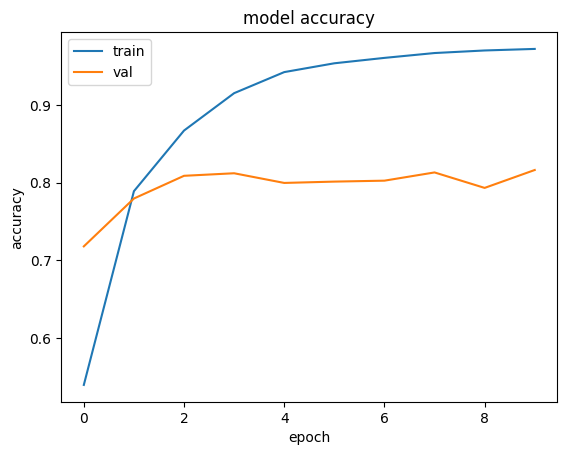

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()